In [6]:
# import tensorflow as tf
# from tensorflow.keras.datasets import fashion_mnist
# from tensorflow.keras.layers import Conv2D, Dropout, Flatten, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

In [21]:
import keras

In [22]:
keras.__version__

'2.5.0'

In [1]:
import os

In [7]:
os.environ['KERAS_BACKEND'] = "plaidml.keras.backend"
K.backend()

'plaidml.keras.backend'

In [8]:
plt.rcParams['figure.figsize'] = (12,4)

In [9]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

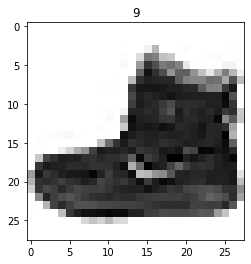

In [10]:
plt.title(train_labels[0])
plt.imshow(train_data[0], cmap=plt.cm.binary)
plt.show()

In [11]:
train_data = train_data.astype(np.float32) / 255
test_data = test_data.astype(np.float32) / 255

In [12]:
train_data.reshape(-1,4)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [13]:
train_images = train_data.reshape(train_data.shape[0], 28,28,1)
test_images = test_data.reshape(test_data.shape[0], 28,28,1)

In [14]:
train_labels = tf.keras.utils.to_categorical(train_labels,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)

## Modelo de datos

In [15]:
from tensorflow.keras.layers import Dense

In [16]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu',   input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu',   input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [17]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [20]:
model.fit(train_images, train_labels,
          batch_size=64,
          epochs=10,
          validation_data=(test_images, test_labels)
)

Epoch 1/10
938/938 [==============================] - 50s 52ms/step - loss: 0.5967 - accuracy: 0.7814
Epoch 2/10
938/938 [==============================] - 48s 51ms/step - loss: 0.4088 - accuracy: 0.8549
Epoch 3/10
938/938 [==============================] - 48s 51ms/step - loss: 0.3721 - accuracy: 0.8690
Epoch 4/10
938/938 [==============================] - 48s 51ms/step - loss: 0.3518 - accuracy: 0.8756
Epoch 5/10
938/938 [==============================] - 46s 49ms/step - loss: 0.3363 - accuracy: 0.8815
Epoch 6/10
938/938 [==============================] - 47s 50ms/step - loss: 0.3256 - accuracy: 0.8828
Epoch 7/10
938/938 [==============================] - 48s 51ms/step - loss: 0.3150 - accuracy: 0.8877
Epoch 8/10
938/938 [==============================] - 47s 50ms/step - loss: 0.3068 - accuracy: 0.8908
Epoch 9/10
938/938 [==============================] - 48s 51ms/step - loss: 0.3031 - accuracy: 0.8914
Epoch 10/10
938/938 [==============================] - 47s 50ms/step - loss: 0.296